# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [ ]:
print("hello")
# import sys
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Get the current working directory
# current_dir = os.getcwd()
# print(f"Current working directory: {current_dir}")

# # Check if we need to change directory to the project root
# if os.path.basename(current_dir) == 'Scripts':
#     project_root = os.path.dirname(current_dir)
#     os.chdir(project_root)
#     print(f"Changed working directory to: {project_root}")
#     sys.path.append(current_dir)
# else:
#     scripts_path = os.path.join(current_dir, 'Scripts')
#     if os.path.exists(scripts_path):
#         sys.path.append(scripts_path)

# # Import modules
# try:
#     from preprocessing import ReviewPreprocessor
#     try:
#         from scraper import main as run_scraper
#     except ImportError:
#         from scraper import main as run_scraper
# except ImportError as e:
#     # Fallback logic if imports fail directly
#     sys.path.append(os.getcwd())
#     from preprocessing import ReviewPreprocessor
#     from scraper import main as run_scraper



Current working directory: /home/haile/Downloads/Scraper&Preprocessing/Scraper&Preprocessing


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [4]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.321755
Total Ratings: 38850
Total Reviews: 8335

Abyssinia: Abyssinia Bank
App ID: com.boa.boaMobileBanking
Current Rating: 4.195008
Total Ratings: 6328
Total Reviews: 1219

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.16962
Total Ratings: 3901
Total Reviews: 771

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:06,  3.45s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Abyssinia Bank


Banks:  67%|██████▋   | 2/3 [00:07<00:03,  3.67s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:10<00:00,  3.63s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Abyssinia Bank: 400
  Dashen Bank: 400

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐
Review: maaliif daddafee install gaafata...
Date: 2025-11-28 13:36:32

Rating: ⭐⭐⭐⭐⭐
Review: good app...
Date: 2025-11-28 11:33:17

Rating: ⭐⭐⭐⭐⭐
Review: This application is very important and advantage for transfer of money and finance in the coutry and foriegn country....
Date: 2025-11-27 23:08:20

Abyssinia Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: goof...
Date: 2025-11-28 13:33:37

Rating: ⭐⭐⭐⭐⭐
Review: good!...
Date: 2025-11-28 12:19:31

Rating: ⭐⭐⭐⭐⭐
Review: good jop...
Date: 2025-11-27 13:19:25

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐
Review: It Is An Amazing app...
Date: 2025-11-28 0

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
2,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,Yohannesb Adugna,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,Mohammed Abrahim,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


In [9]:
#Separate data for the 3 different apps
df = pd.read_csv("data/raw/reviews_raw.csv")

for bank in df['bank_code'].unique():
    bank_df = df[df['bank_code'] == bank]
    bank_df.to_csv(f"data/raw/reviews_raw_{bank}.csv", index=False)

## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [6]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 275 (22.92%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-09-30 to 2025-11-28

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Abyssinia Bank: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 733 (61.1%)
  ⭐⭐⭐⭐: 90 (7.5%)
  ⭐⭐⭐: 67 (5.6%)
  ⭐⭐: 45 (3.8%)
  ⭐: 265 (22.1%)

Date range: 2024-09-30 to 2025-11-28

Text statisti

In [ ]:
#separate the 3 banks' preprocessed data
processed_df = pd.read_csv("data/processed/reviews_processed.csv")

for bank in processed_df['bank_code'].unique():
    bank_df = processed_df[df['bank_code'] == bank]
    bank_df.to_csv(f"data/processed/reviews_processed_{bank}.csv", index=False)


## 3. Visualizations

Let's explore the cleaned data.

/tmp/ipykernel_19088/307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
/tmp/ipykernel_19088/307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


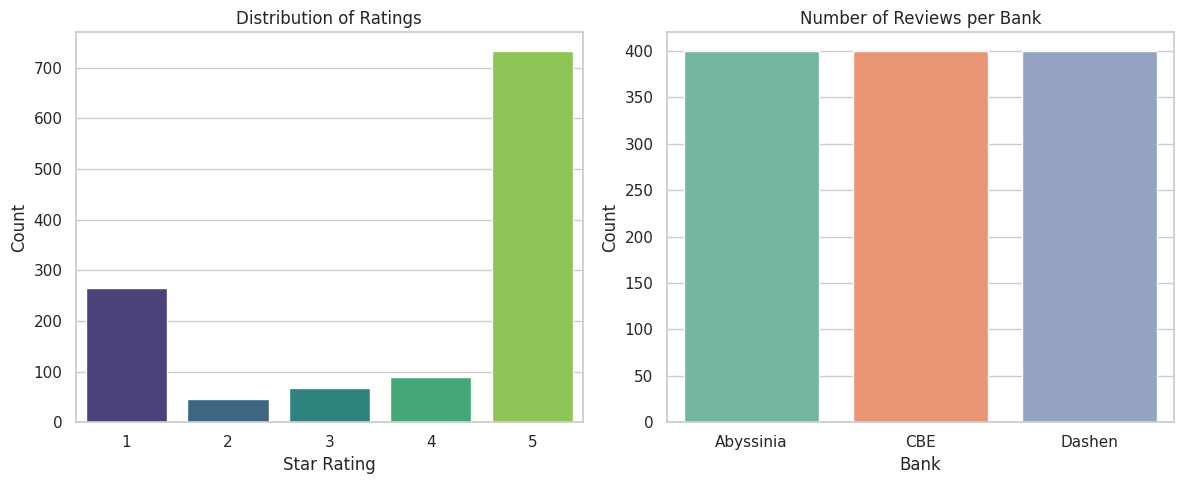

In [7]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

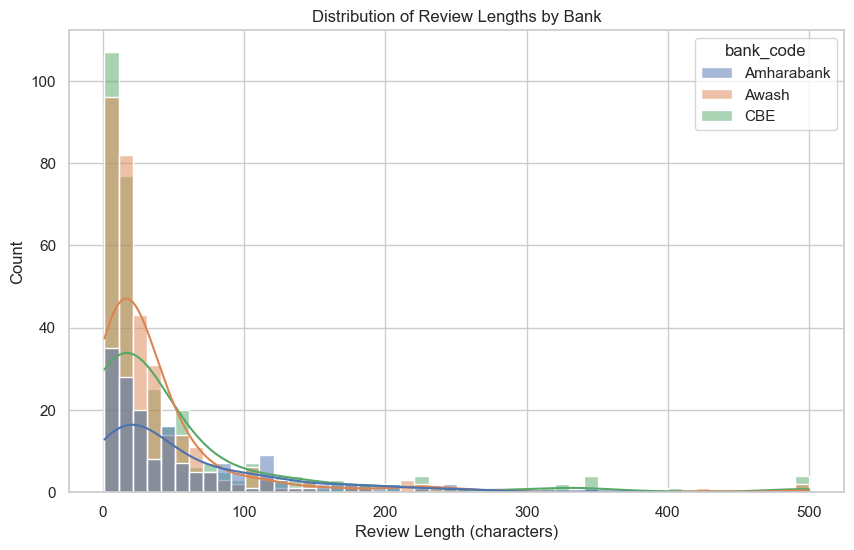

In [5]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()